The idea is to develope a neural network capable of predicting gold price information based on date and previous day price informations

Dataset: https://www.kaggle.com/datasets/guillemservera/precious-metals-data

In [7]:
import pandas as pd
import plotly.graph_objects as go

df = pd.read_csv('data/data_gold.csv')

chart = go.Figure(go.Candlestick(x=df.date, open=df.open, high=df.high, low=df.low, close=df.close))
chart.update_layout(xaxis_rangeslider_visible=False, template='plotly_dark')
chart.show()

In [8]:
import numpy as np

print(df.isnull().sum())

# verificando dados negativos ou infinitos
for c in df.columns[1:]:
  for r in range(len(df[c])):
    if df[c][r] < 0 or df[c][r] == np.inf:
      print(f'Negative value found in row {r} column {c}')

date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64


In [9]:
# Data normalization

from sklearn.preprocessing import MaxAbsScaler, OrdinalEncoder

array = np.array(df.date).reshape(-1, 1)
df.date = OrdinalEncoder().fit_transform(array)

scaler = MaxAbsScaler()
scaler.fit(df)
data = scaler.transform(df)

In [10]:
# IO definition

inputs = data.copy()

for c in range(len(inputs)):
  try:
    inputs[c][0] = inputs[c+1][0]
  except Exception:
    print('Operation finished')

inputs = inputs[0:len(inputs) - 1]
outputs = data.copy()[1:, 1:]

Operation finished


In [11]:
# Spliting data

from sklearn.model_selection import train_test_split as tts

trainIn, testIn, trainOut, testOut = tts(inputs, outputs, shuffle=False, train_size=0.90)

In [13]:
# Treinando rede neural

from sklearn.neural_network import MLPRegressor

nn = MLPRegressor(hidden_layer_sizes = [6, 5], activation='identity', max_iter = 10000)
nn.fit(trainIn, trainOut)

predicted_output = nn.predict(testIn)

In [17]:
from sklearn.metrics import max_error, mean_squared_error, mean_absolute_error, r2_score

print("Metrics (norm.) \n")
print('Max. error:', max_error(testOut[0:, 3], predicted_output[0:, 3]))
print('MSE:', mean_squared_error(testOut[0:, 3], predicted_output[0:, 3]))
print('MAE:', mean_absolute_error(testOut[0:, 3], predicted_output[0:, 3]))

Metrics (norm.) 

Max. error: 0.04897494103857014
MSE: 0.0003740005491011609
MAE: 0.016301208657470045


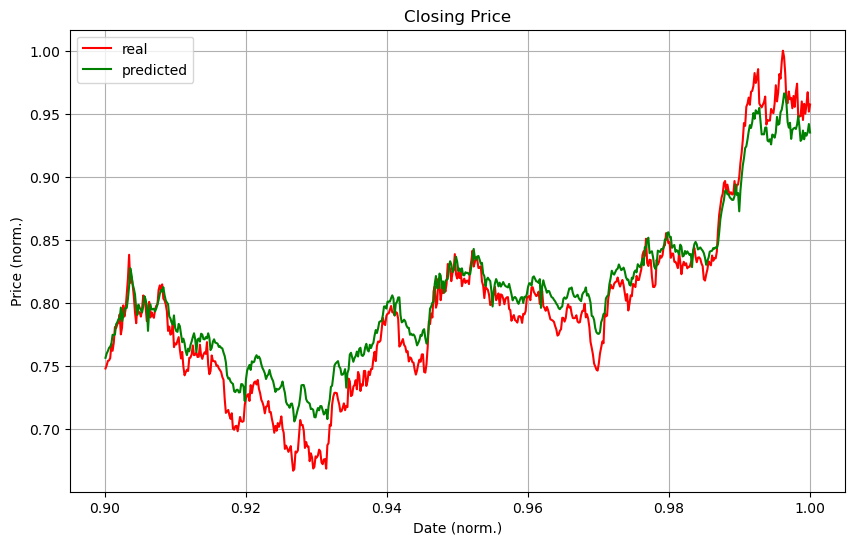

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(testIn[0:, 0], testOut[0:, 3], 'r', label="real")
plt.plot(testIn[0:, 0], predicted_output[0:, 3], 'g', label="predicted")

plt.title('Closing Price')
plt.xlabel('Date (norm.)')
plt.ylabel('Price (norm.)')
plt.legend()
plt.grid()

# plt.savefig('closing_price.jpg', bbox_inches='tight')
plt.show()